# Multiple Linear Regression 

Problem Statement:

Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
To know the accuracy of the model, i.e. how well do these variables predict the house prices

## Step 1 : Reading and Data Understanding

In [56]:
# Warning import
import warnings
warnings.filterwarnings('ignore')
#import libraries
import numpy as np 
import pandas as pd

#Data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Librraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Reading the data set
Housing_df = pd.read_csv('Housing.csv')

In [3]:
# Check the head of the dataset
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Inspect the various aspects of the housing dataframe

In [4]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As per the meta data there are no variables with null.

In [5]:
Housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

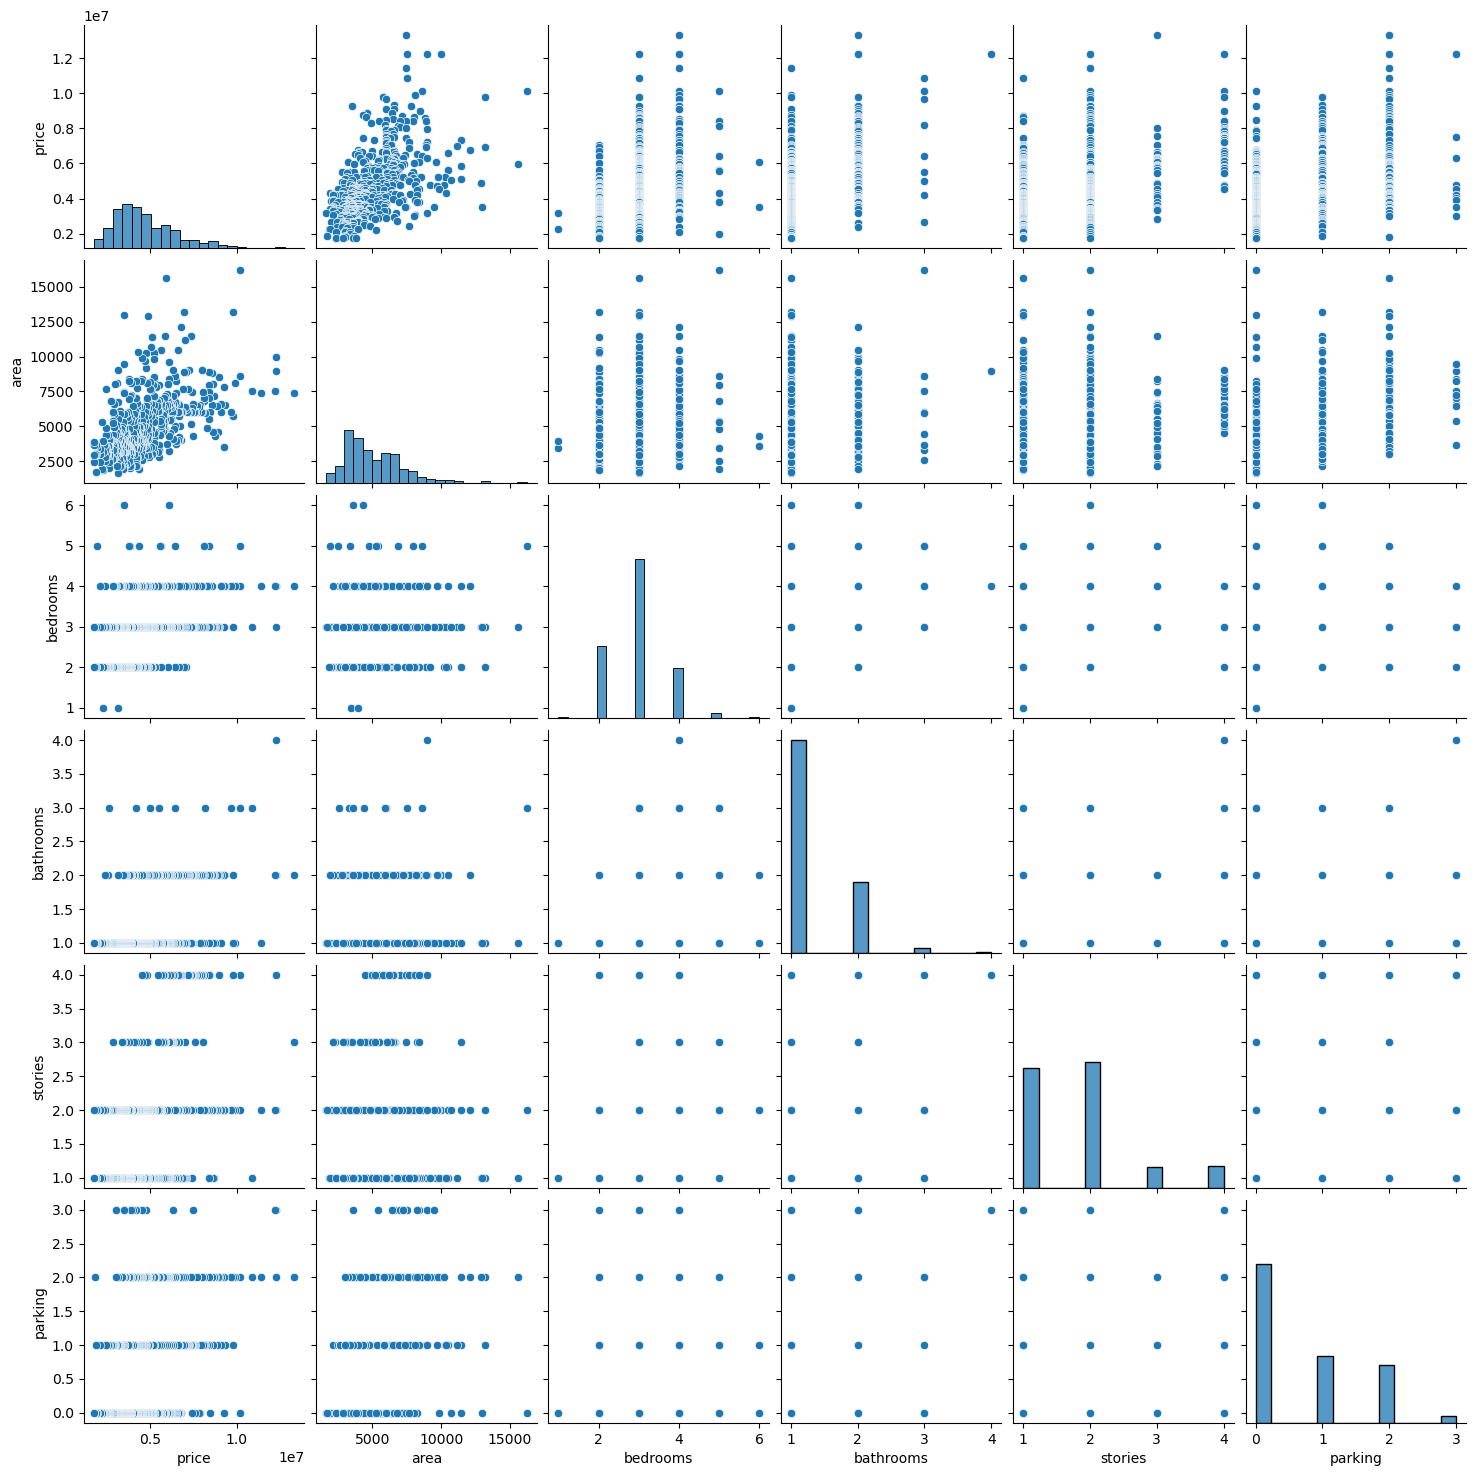

In [6]:
sns.pairplot(Housing_df)
plt.show()

As per the above graph there is an positive corelation between Price and area parameters.

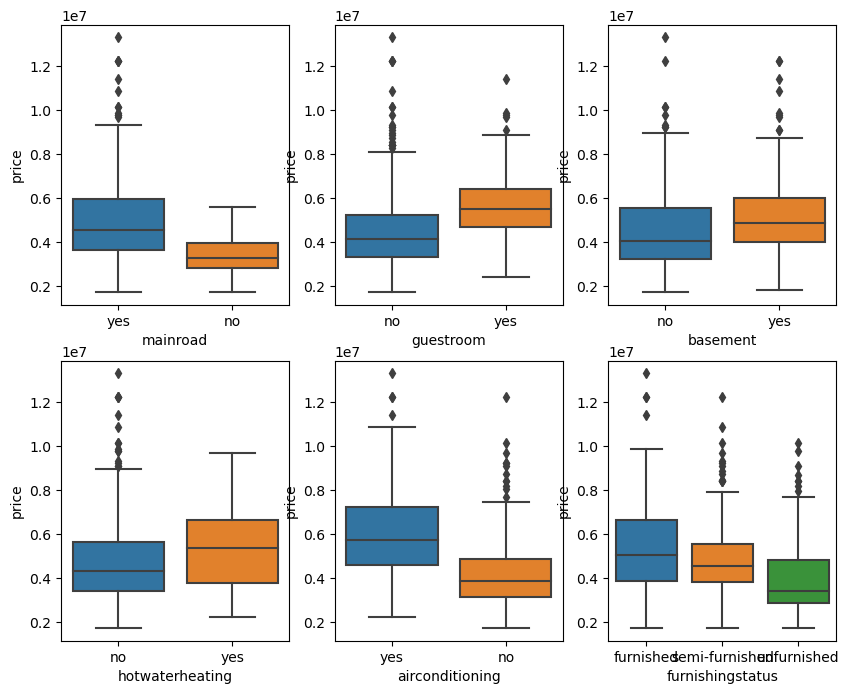

In [7]:
# As per the data set there are categorical values let us understand using box plot
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="mainroad", y = "price", data= Housing_df)
plt.subplot(2,3,2)
sns.boxplot(x="guestroom", y = "price", data= Housing_df)
plt.subplot(2,3,3)
sns.boxplot(x="basement", y = "price", data= Housing_df)
plt.subplot(2,3,4)
sns.boxplot(x="hotwaterheating", y = "price", data= Housing_df)
plt.subplot(2,3,5)
sns.boxplot(x="airconditioning", y = "price", data= Housing_df)
plt.subplot(2,3,6)
sns.boxplot(x="furnishingstatus", y = "price", data= Housing_df)
plt.show()

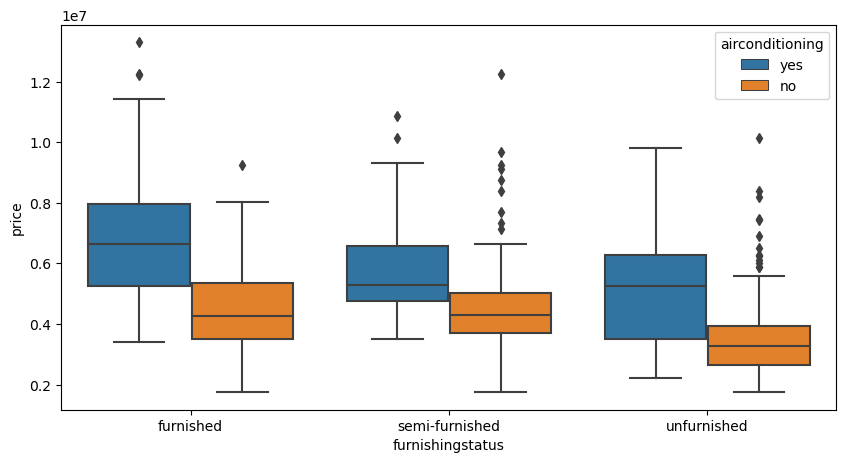

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = Housing_df)
plt.show()

## Step 3: Data Preparation

- Encoding:
    - Converting binary variables to 1/0
    - Other categorical values to dummy variables

#### Yes/No variables 

In [9]:
# Yes/No variables
varlis = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

Housing_df[varlis] = Housing_df[varlis].apply(lambda x: x.map(({'yes' : 1, 'no' : 0})))
Housing_df.head()                                                                                    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


 As we can see all the Yes or No Categorical data is converted into Numeric data

#### Dummy Variables

In [11]:
# creating dummy var for furnishingstatus
status = pd.get_dummies(Housing_df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [12]:
# Normall furnishingstatus is single parameter with 3 types now with the help of dummy function we created 3 columns

Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to semi-furnished

In [13]:
# Droping the reducent from the var
status = status = pd.get_dummies(Housing_df['furnishingstatus'], drop_first= True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [14]:
# concat the dummy var with the Housing data set
Housing_df = pd.concat([Housing_df, status], axis = 1)
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
# Drop 'furnishingstatus' as we have created the dummies for it

Housing_df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [16]:
Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets 

#Before model building, you first need to perform the test-train split and scale the features.

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Housing_df, train_size= 0.7, random_state= 100)

In [18]:
df_train.shape

(381, 14)

In [19]:
df_test.shape

(164, 14)

Rescaling the Features
>As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

  - Min-Max scaling (normalization) Between 0 and 1.
  - Standardisation (mean-0, sigma-1).

This time, we will use MinMax scaling.

In [20]:
# Min Max Scaling take care of outliers
# Normalization = (X - Xmin)/(Xmax - Xmin)

# Standardazation = (X - mu)/sigma
#The advantage of Standardisation it doesn't compress the data between a particular range as in Min-Max scaling.
#This is useful, especially if there are extreme data point (outlier).

In [21]:
#1.Instantiate an object
scaler = MinMaxScaler()

#2.Create the list of numeric variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

#3.Fit on data
# Three types
#a)fit
#b)transofrm
#c)fit_transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [23]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Training the Model

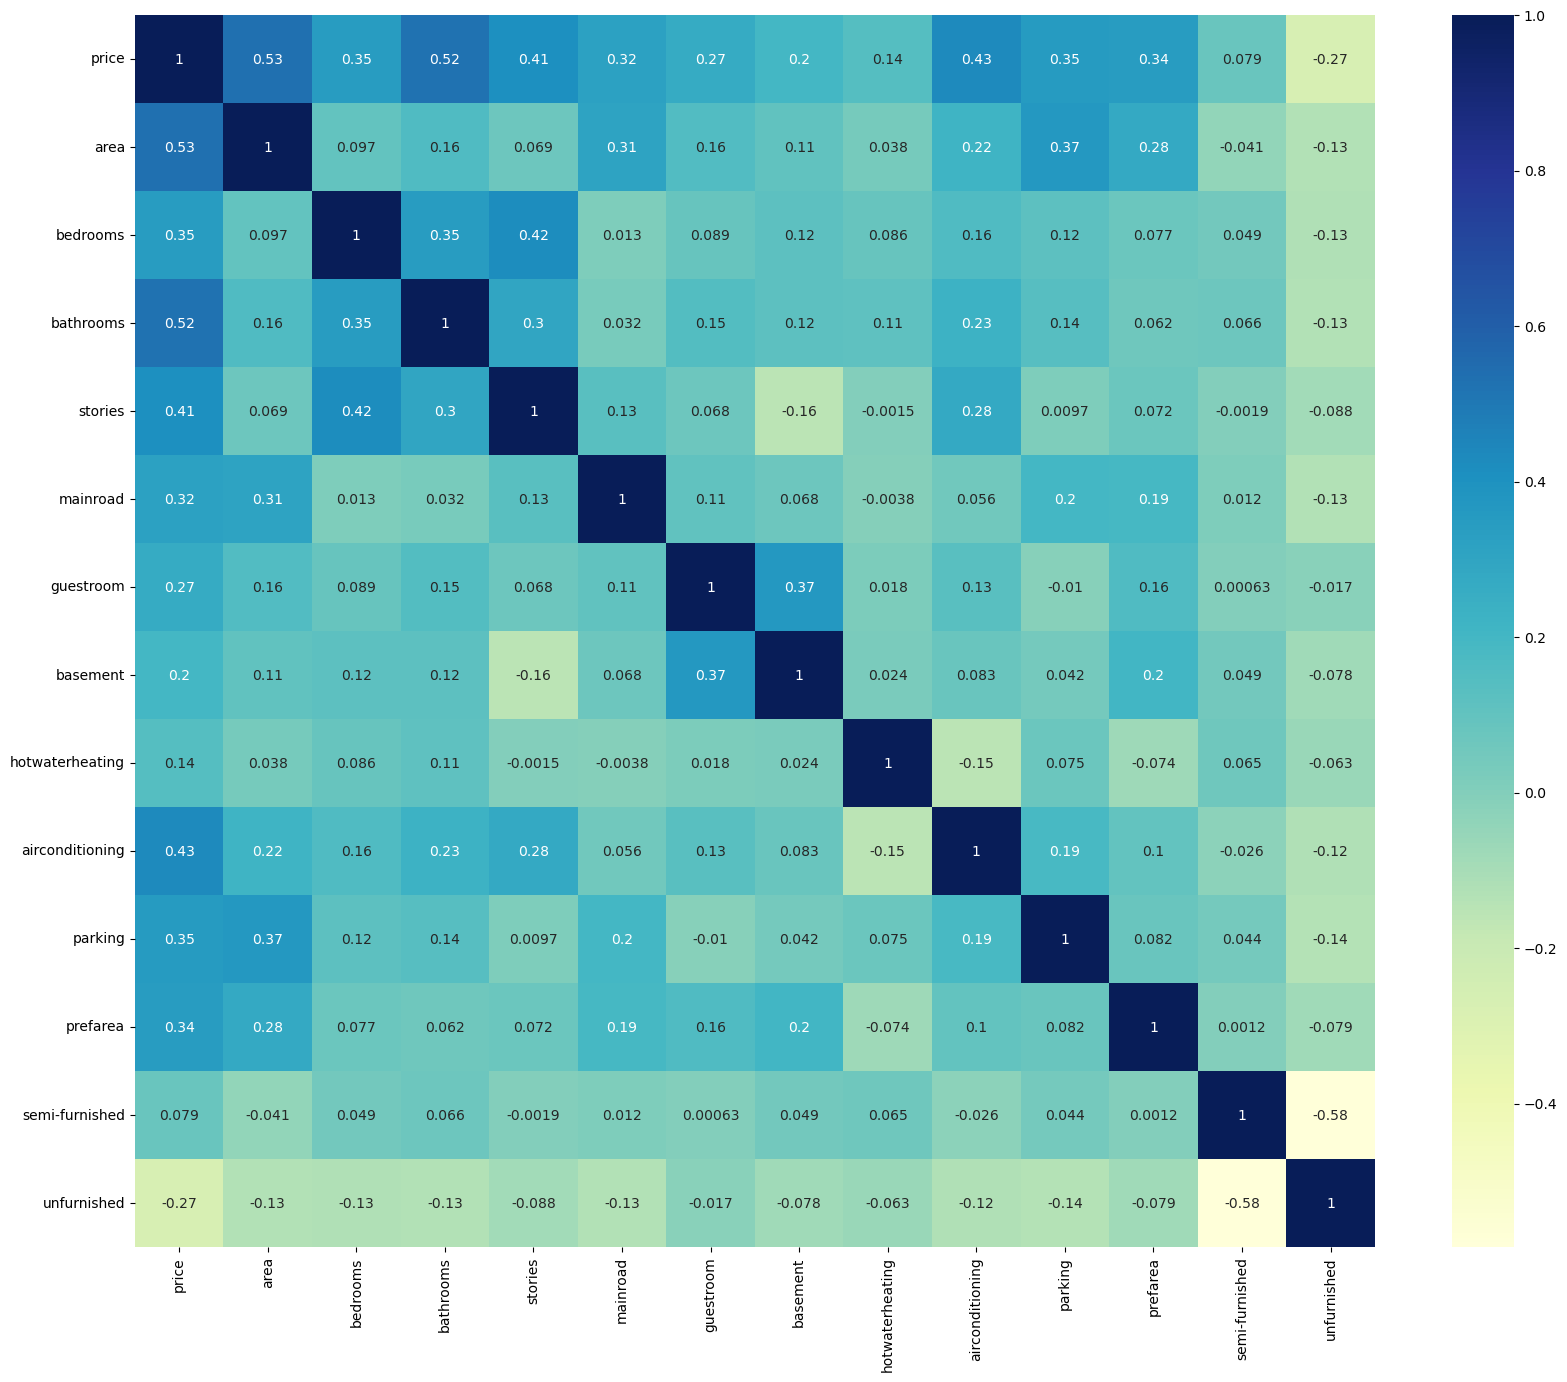

In [24]:
#Let's check the correlation coefficients to see which variables are highly correlated with the help of Heat map. 
plt.figure(figsize=(20,16))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

As you might have noticed, area seems to the correlated to price the most. Let's see a pairplot for area vs price.

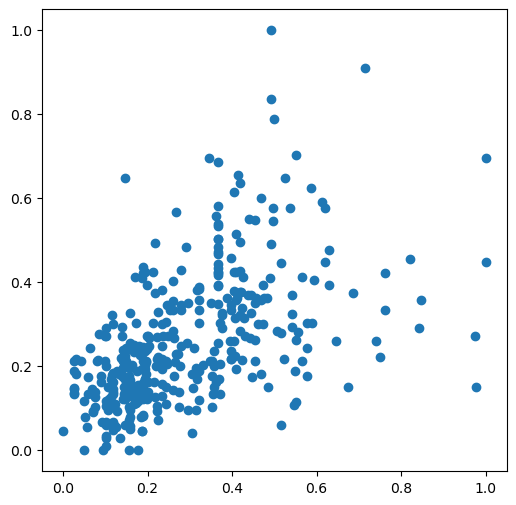

In [25]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

### Building the Model - I

Let's build the model. 
You will follow a bottom-up approach for this, i.e., you will start by building the model with just one variable.

In [26]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [27]:
#add a constant
X_train_sm = sm.add_constant(X_train['area'])

# Create the first model
Lm = sm.OLS(y_train, X_train_sm)

# Fit the model
Lm_model = Lm.fit()

#prams
Lm_model.params

const    0.126894
area     0.462192
dtype: float64

In [28]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.15e-29
Time:                        23:23:29   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# adding another variable bathrooms
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
Lm = sm.OLS(y_train, X_train_sm)
Lm_model = Lm.fit()

Lm_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [30]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.51e-54
Time:                        23:23:29   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# adding another variable airconditioning
X_train_sm = X_train[['area','bathrooms','airconditioning']]
X_train_sm = sm.add_constant(X_train_sm)
Lm = sm.OLS(y_train, X_train_sm)
Lm_model = Lm.fit()

Lm_model.params

const              0.094756
area               0.358061
bathrooms          0.265044
airconditioning    0.086986
dtype: float64

In [32]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           6.61e-63
Time:                        23:23:29   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# adding another variable stories
X_train_sm = X_train[['area','bathrooms','airconditioning','stories']]
X_train_sm = sm.add_constant(X_train_sm)
Lm = sm.OLS(y_train, X_train_sm)
Lm_model = Lm.fit()

Lm_model.params

const              0.071924
area               0.361972
bathrooms          0.228600
airconditioning    0.069592
stories            0.118698
dtype: float64

In [34]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.14e-69
Time:                        23:23:29   Log-Likelihood:                 329.46
No. Observations:                 381   AIC:                            -648.9
Df Residuals:                     376   BIC:                            -629.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0719      0.011      6.677      0.000       0.051       0.093
area                0.3620      0.030     12.094      0.000       0.303       0.421
bathrooms           0.2286      0.024      9.651      0.000       0.182       0.275
airconditioning     0.0696      0.012      5.647      0.000       0.045       0.094
stories             0.1187      0.019      6.187      0.000       0.081       0.156
==============================================================================
Omnibus:                       82.202   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.090
Skew:                           0.994   Prob(JB):                     1.99e-52
Kurtosis:                       6.324   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# adding another variables bedrooms,parking,prefarea
X_train_sm = X_train[['area','bathrooms','airconditioning','stories','bedrooms','parking','prefarea']]
X_train_sm = sm.add_constant(X_train_sm)
Lm = sm.OLS(y_train, X_train_sm)
Lm_model = Lm.fit()

Lm_model.params

const              0.043308
area               0.277998
bathrooms          0.212019
airconditioning    0.062291
stories            0.107093
bedrooms           0.068732
parking            0.072685
prefarea           0.069586
dtype: float64

In [36]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     91.33
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           6.31e-77
Time:                        23:23:29   Log-Likelihood:                 354.04
No. Observations:                 381   AIC:                            -692.1
Df Residuals:                     373   BIC:                            -660.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0433      0.016      2.763      0.006       0.012       0.074
area                0.2780      0.031      8.997      0.000       0.217       0.339
bathrooms           0.2120      0.023      9.201      0.000       0.167       0.257
airconditioning     0.0623      0.012      5.330      0.000       0.039       0.085
stories             0.1071      0.019      5.540      0.000       0.069       0.145
bedrooms            0.0687      0.039      1.784      0.075      -0.007       0.144
parking             0.0727      0.019      3.843      0.000       0.035       0.110
prefarea            0.0696      0.012      5.698      0.000       0.046       0.094
==============================================================================
Omnibus:                       70.730   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.599
Skew:                           0.865   Prob(JB):                     7.50e-44
Kurtosis:                       6.085   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building the Model - II

More generally, you first build a model using all and then try to improve the model by dropping some of them.

In [37]:
#add a constant
X_train_sm = sm.add_constant(X_train)

# Create the first model
Lm = sm.OLS(y_train, X_train_sm)

# Fit the model
Lm_model = Lm.fit()

#prams
Lm_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [38]:
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           8.83e-83
Time:                        23:23:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will use two main parameters to judge the insignificant variables, the p-values and the VIFs
 - p-value
 - VIF

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

#### VIF = 1/(1-Ri^2) 

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
- High p-value, High VIF
- High p-value, Low VIF - remove first
- Low p-value, High VIF - remove after
- Low p-value, Low VIF

In [40]:
X = X_train.drop('semi-furnished', axis = 1)

In [41]:
#add a constant
X_train_sm = sm.add_constant(X)

# Create the first model
Lm = sm.OLS(y_train, X_train_sm)

# Fit the model
Lm_model = Lm.fit()

#summary
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.07e-83
Time:                        23:23:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [43]:
X = X.drop('bedrooms', axis = 1)

In [44]:
#add a constant
X_train_sm = sm.add_constant(X)

# Create the first model
Lm = sm.OLS(y_train, X_train_sm)

# Fit the model
Lm_model = Lm.fit()

#summary
Lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                        23:23:29   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data 

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [46]:
y_train_pred = Lm_model.predict(X_train_sm)
y_train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

<Axes: ylabel='Density'>

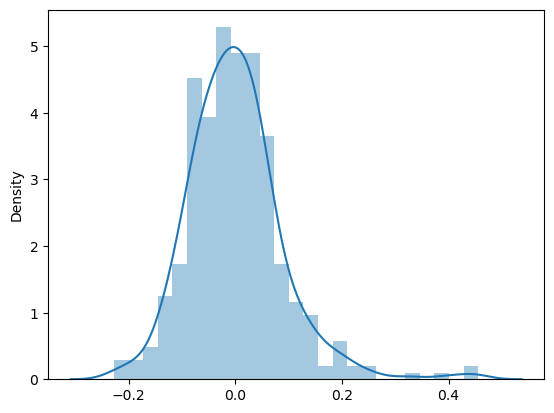

In [47]:
res = y_train - y_train_pred
sns.distplot(res)

## Step 7: Predictions and Evaluation Data Set Using the Final Model 

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [48]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']


# Three types
#a)fit
#b)transofrm
#c)fit_transform
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [49]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [50]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_test = df_test.pop('price')
X_test = df_test

In [52]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [53]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'], axis = 1)

In [57]:
#Predict
y_test_pred = Lm_model.predict(X_test_sm)

In [58]:
#Evaluate
r2_score(y_true= y_test, y_pred= y_test_pred)

0.6713505684480789

The correct equation for price

𝑝𝑟𝑖𝑐𝑒=0.236×𝑎𝑟𝑒𝑎+0.202×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.04×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.0876×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.0682×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0637×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0337×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑+0.0428

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

 - Add new features (bathrooms/bedrooms, area/stories, etc.)
 - Build a non-linear model